Importamos las librerias necesarias

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

Cargamos el dataset

In [11]:
df = pd.read_csv('ventas_tienda.csv')

In [12]:
if 'Total_Venta' not in df.columns:
    df['Total_Venta'] = df['Precio_Unitario'] * df['Cantidad']

Cambiamos la columna fecha por datetime

In [13]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

Creamos una vista previa del dataset

In [14]:
print("Columnas actuales:", df.columns)
print("\nPrimeras 5 filas con la nueva columna:")
display(df.head())

Columnas actuales: Index(['ID_Transaccion', 'Fecha', 'Categoria', 'Producto', 'Precio_Unitario',
       'Cantidad', 'Costo_Unitario', 'Metodo_Pago', 'Cliente_Genero',
       'Total_Venta'],
      dtype='object')

Primeras 5 filas con la nueva columna:


,ID_Transaccion,Fecha,Categoria,Producto,Precio_Unitario,Cantidad,Costo_Unitario,Metodo_Pago,Cliente_Genero,Total_Venta
0,T-1001,2024-01-02,Electronica,Audifonos BT,50.0,2,25.0,Tarjeta Credito,F,100.0
1,T-1002,2024-01-02,Accesorios,Funda Celular,15.0,1,5.0,Efectivo,M,15.0
2,T-1003,2024-01-03,Electronica,Cable USB-C,10.0,5,3.0,Tarjeta Debito,M,50.0
3,T-1004,2024-01-03,Hogar,Lampara LED,25.0,1,12.0,Transferencia,F,25.0
4,T-1005,2024-01-04,Electronica,Mouse Inalambrico,20.0,3,10.0,Efectivo,F,60.0


Para optimizar nuestra estrategia, es fundamental identificar qué categorías de productos están generando el mayor volumen de ingresos brutos. 
El siguiente gráfico compara la facturación total acumulada de cada categoría (Electrónica, Accesorios, Hogar) para determinar cuál es el motor financiero principal del negocio y dónde debemos enfocar los esfuerzos de venta."

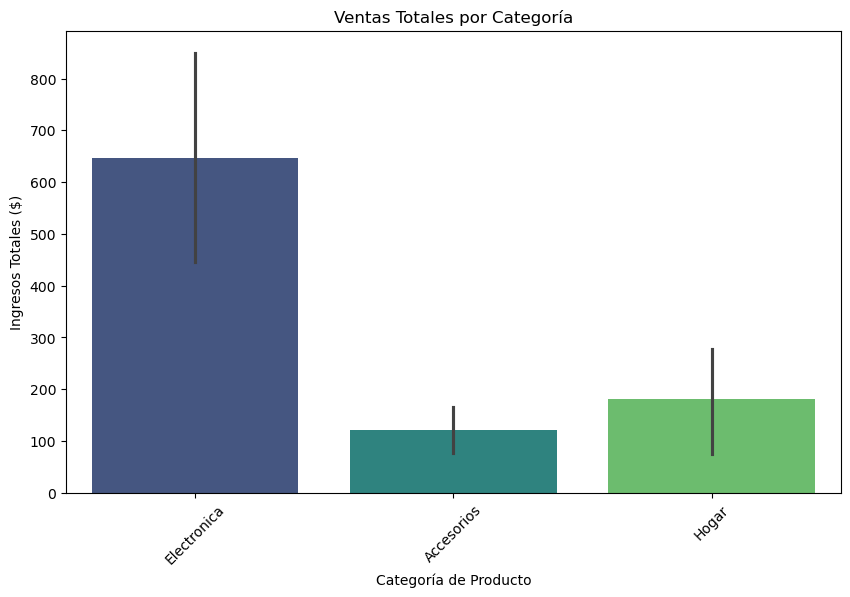

In [17]:
#Tamaño del lienzo
plt.figure(figsize=(10, 6))

#Dibujar grafico
sns.barplot(
    data=df, 
    x='Categoria', 
    y='Total_Venta', 
    estimator=sum, 
    hue='Categoria', 
    palette='viridis', 
    legend=False
)

#Etiquetas y titulos
plt.title('Ventas Totales por Categoría')
plt.ylabel('Ingresos Totales ($)')
plt.xlabel('Categoría de Producto')
plt.xticks(rotation=45)

#Mostrar resultado
plt.show()

In [ ]:
Por el resultado mostrado en el grafico, podemos conlcuir que la categoría Electronica es la que genera el mayor volumen de ingreso bruto.
Por lo que conviene enfocar nuestros esfuerzos de venta a esta categoría.

In [ ]:
En el comercio minorista, un alto volumen de ventas no siempre garantiza una alta rentabilidad. 
Este gráfico contrasta la facturación bruta (Total_Venta) contra la ganancia neta (Ganancia_Total) para cada categoría.
El objetivo es visualizar el margen de beneficio real y detectar si existen categorías con muchas ventas pero 
bajo retorno de inversión debido a altos costos operativos.

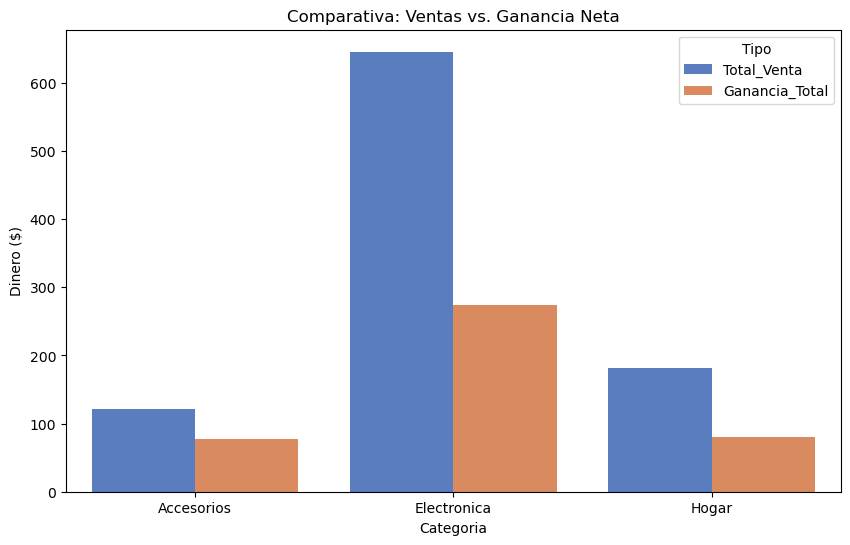

In [19]:
if 'Costo_Unitario' in df.columns:
    df['Ganancia_Total'] = (df['Precio_Unitario'] - df['Costo_Unitario']) * df['Cantidad']

#Graficar Ventas vs Ganancias por Categoria
comparativa = df.groupby('Categoria')[['Total_Venta', 'Ganancia_Total']].sum().reset_index()
comparativa = pd.melt(comparativa, id_vars='Categoria', var_name='Tipo', value_name='Monto')

plt.figure(figsize=(10, 6))
sns.barplot(data=comparativa, x='Categoria', y='Monto', hue='Tipo', palette='muted')

plt.title('Comparativa: Ventas vs. Ganancia Neta')
plt.ylabel('Dinero ($)')
plt.show()

In [ ]:
Podemos observar que la categoría electronica es la categorían que mantiene el flujo de la caja, domina completamente en
volumen de ingresos y ganancias brutas totales.
En la categoria accesorios observamos que la barra ganancias (Naranja) es más de la mitad que la barra ventas (Azul). 
Esto sugiere un margen de utilidad muy alto. Aunque vende menos en total, es muy rentable por unidad vendida.
Hogar es la categoria menos rentable pero teine mas volumen de Ventas que accesorios.

In [ ]:
Sabemos que la categoria que mas vende es electronica pero ¿estos ingresos son constantes o dependen de pocas ventas
de precios altos?

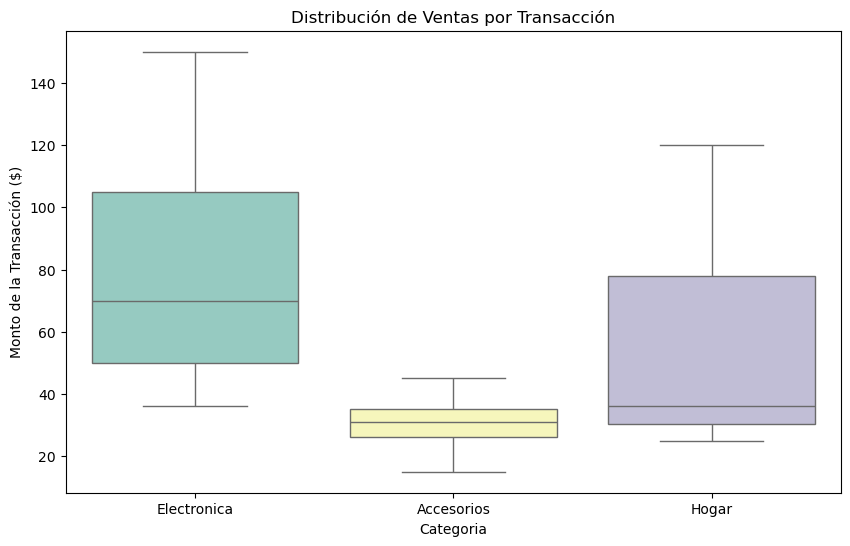

In [22]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Categoria', y='Total_Venta', hue='Categoria', legend=False, palette='Set3')

plt.title('Distribución de Ventas por Transacción')
plt.ylabel('Monto de la Transacción ($)')
plt.show()

In [ ]:
Observando la grafica podemos observar que el promedio de ventas fueron de $70 y se vendieron productos de hasta $150
Los precios de accesorios se mantienen constantes
En hogar vendemos productos baratos pero podemos intuir que tiene ventas eventuales de productos más caros.

In [ ]:
Finalmente creamos una tabla de resumen con los datos más importantes para digerir mas facil los datos
observados en los graficos antes vistos.

In [23]:
#Creamos la tabla de resumen
resumen = df.groupby('Categoria').agg({
    'Total_Venta': ['sum', 'mean', 'count'],  #Suma total, Promedio de venta, Cantidad de tickets
    'Ganancia_Total': 'sum'                   #Ganancia total
}).reset_index()

resumen.columns = ['Categoría', 'Ventas Totales ($)', 'Ticket Promedio ($)', 'Num. Transacciones', 'Ganancia Neta ($)']

resumen['Margen (%)'] = (resumen['Ganancia Neta ($)'] / resumen['Ventas Totales ($)']) * 100

print("RESUMEN EJECUTIVO DEL NEGOCIO:")
display(resumen.round(2)) #redondea a 2 decimales

RESUMEN EJECUTIVO DEL NEGOCIO:


,Categoría,Ventas Totales ($),Ticket Promedio ($),Num. Transacciones,Ganancia Neta ($),Margen (%)
0,Accesorios,122.0,30.50,4,77.0,63.11
1,Electronica,646.0,80.75,8,274.0,42.41
2,Hogar,181.0,60.33,3,81.0,44.75
